## ENSEMBLE TECHNIQUE PROJECT: Travel Package Purchase Prediction

**Solomon Akatakpo (PhD.)**

### Problem Statement

### Context

The policymaker of a tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the data of the last year, it was observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is a package that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle, and support or increase one's sense of well-being. For the launch of the new package, the company wants to harness the available data of existing and potential customers to target the right customers.

## Objective

You as a Data Scientist at "Visit with us" travel company has to analyze the customer data and information to provide recommendations to the policymaker and build a model to predict the chances of a potential customer purchasing the newly introduced travel package before the customer is contacted.

## Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## Import Necessary Libraries

In [2]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [3]:
#Loading the dataset
data=pd.read_csv("Tourism.csv")

## Data Overview

In [4]:
data.head(10) ##view the first 10 rows of data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [5]:
data.tail(10) ##View the last 10 rows of data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [6]:
data.shape ##To understand the shape of the dataset

(4888, 20)

The dataset has 4888 rows and 20 columns

In [7]:
data.info() ## To check the data types of the different columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

There are six object type variables and 14 numerical variables in the dataset

In [8]:
##Checking for unique values for the columns in the dataset
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique value(s):")
    print(unique_values)
    print()

Column 'CustomerID' has 4888 unique value(s):
[200000 200001 200002 ... 204885 204886 204887]

Column 'ProdTaken' has 2 unique value(s):
[1 0]

Column 'Age' has 45 unique value(s):
[41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]

Column 'TypeofContact' has 3 unique value(s):
['Self Enquiry' 'Company Invited' nan]

Column 'CityTier' has 3 unique value(s):
[3 1 2]

Column 'DurationOfPitch' has 35 unique value(s):
[  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]

Column 'Occupation' has 4 unique value(s):
['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Column 'Gender' has 3 unique value(s):
['Female' 'Male' 'Fe Male']

Column 'NumberOfPersonVisiting' has 5 unique value(s):
[3 2 1 4 5]

Column 'NumberOfFollowups' h

The CustomerID column has unique values. This needs to be dropped

In [9]:
#data = data.drop("CustomerID", axis=1, inplace=True)
#dropping the customerID column creates errow in the work flow.
#Wil drop it when defining the train and test datasets

In [10]:
data2 = pd.read_csv("Tourism.csv")

In [11]:
data2.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

The following columns and their associated missing numbers are shown above. The Age column has 226 missing values, TypeofContact column has 25 missing values. DurationOfPitch column has 251 missing values, NumberOfFollowups has 45 missing values, PreferredPropertyStar column has 26 missing values, NumberofTrips has 140 missing values, NumberofChildrenVisiting column has 66 missing values, MonthlyIncome has 233 missing values.


## Exploratory Data Analysis

In [12]:
# Making a list of all categorical variables
cat_col = ['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
           'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
           'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
           'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

# Printing the count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-' * 50)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
--------------------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisiting, dtype: int64
--------------------------------------------------
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64
--------------------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
------------

In [13]:
#Replace 'Fe Male' with 'Female'
data['Gender'] = data['Gender'].replace('Fe Male', 'Female')

In [14]:
#Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4662 non-null   float64 
 3   TypeofContact             4863 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4637 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4843 non-null   category
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4862 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4748 non-null   float6

In [16]:
## Creating a copy of data to perform detailed EDA in the appendix section 
data1 = data.copy()

## Univariate Analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

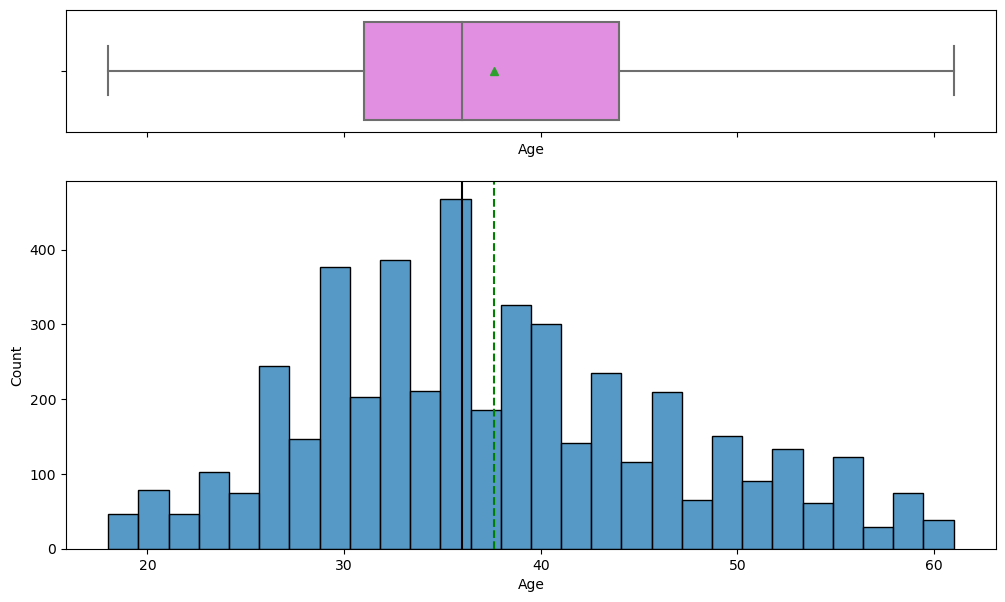

In [19]:
#Observations on age
histogram_boxplot(data1, "Age")

- The age data is slightly right skewed.
- The age of customers range from 18 to 61 with average age of ~ 38

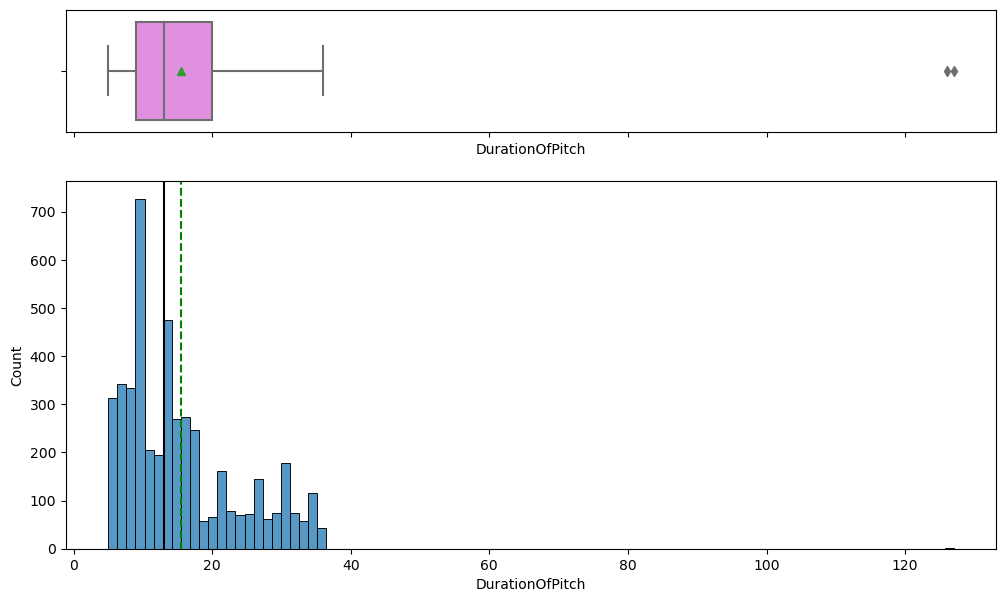

In [20]:
#Observation on duration of pitch
histogram_boxplot(data1, "DurationOfPitch")

- The duration of pitch data has outlier values on the upper ends of the data
- The duration of pitch is slightly skewed to the right. Duration of piitch range from 5 to 127 with average value of 15.49

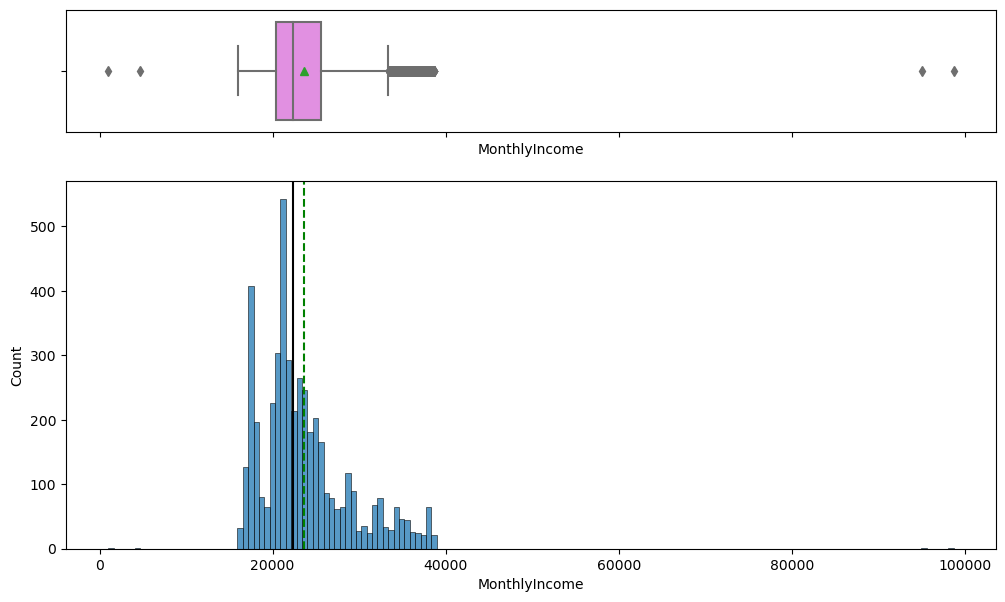

In [21]:
#Observation on Income
histogram_boxplot(data1, "MonthlyIncome")

- Monthly income has outlier values on both the upper and the lower ends of the data
- Income gross monthly income of customers range from 1000 to 98,687 with mean value of 23619
- The gross monthly income of customers is slighly right skewed.

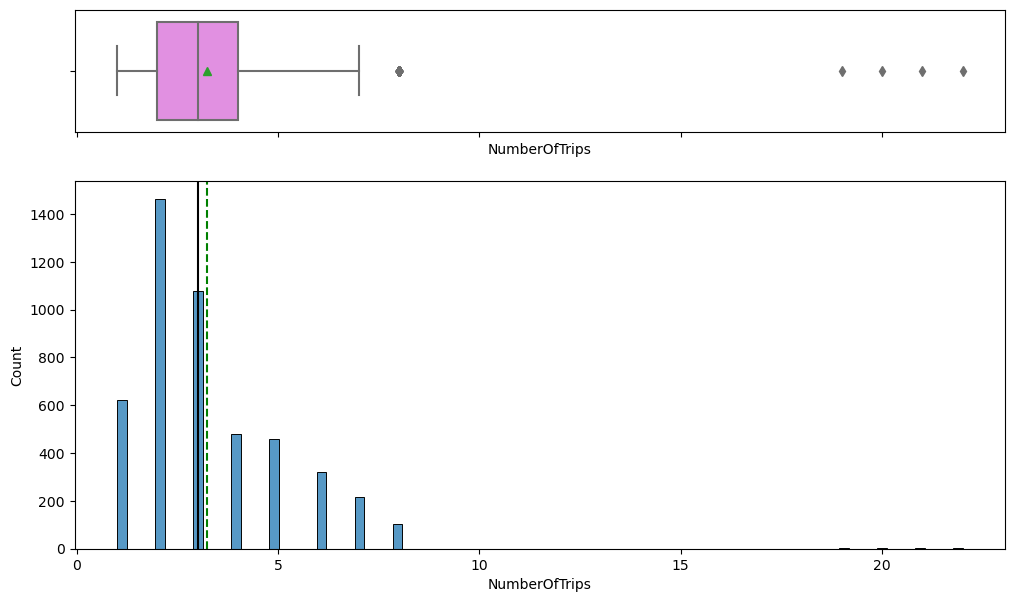

In [22]:
#Observation on number of trips
histogram_boxplot(data1, "NumberOfTrips")

- The number of trips column has outlier on the upper ends of the data
- The number of trips is slightly skewed to the right
- The number of trips range from1 to 22 with an average of 15.4

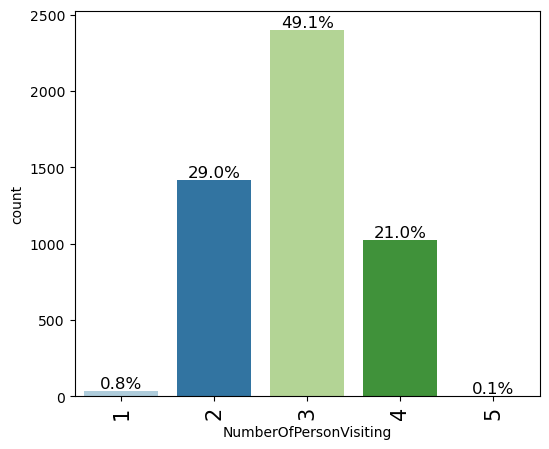

In [23]:
#Observation on the number of persons visiting
labeled_barplot(data1, "NumberOfPersonVisiting", perc=True)

- Overall, the cutomer with three persons accompanying has the highest count. This is followed by customers with two accompanying persons, then 4 accompanying persons. The lowest count are customers with one accompanyiong person for the trip

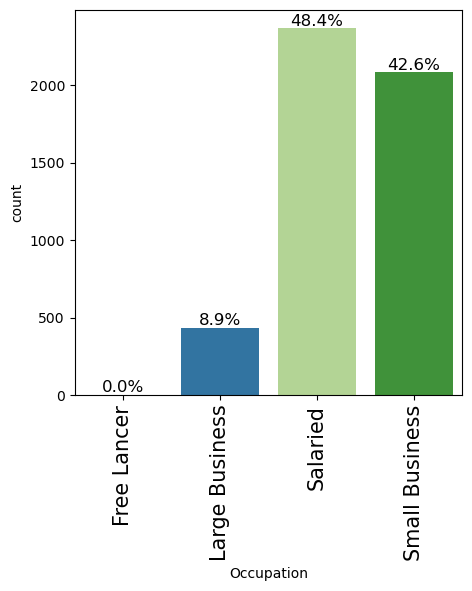

In [24]:
#Observation on occupation
labeled_barplot(data1, "Occupation", perc=True)

- The customer base is dominated by salaried(48.4%) and small business(42.6%) owners. Large business owners makes up a smaller fraction (8.9%) of customers

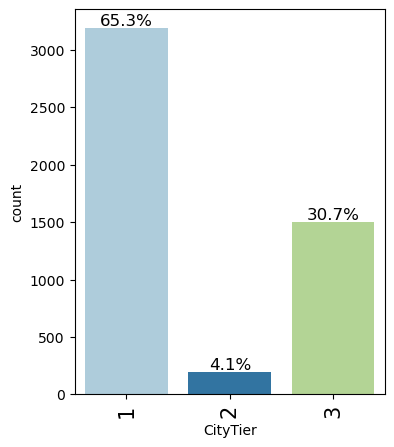

In [25]:
#Observation on CityTier
labeled_barplot(data1, "CityTier", perc=True)

- Majority of customers are from the CityTier1 which is more developed than the other two CityTiers. Would be interesting to see how the CityTier trends with MonthlyIncome

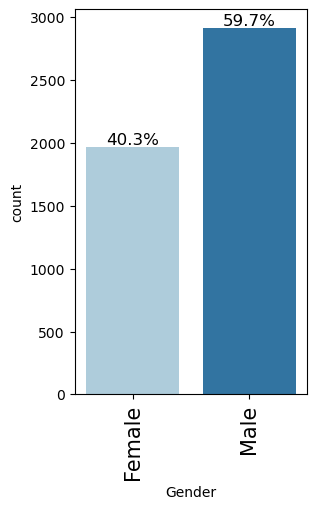

In [26]:
labeled_barplot(data1, "Gender", perc=True)

- There are more male (59.7%) than female customers(40.3%)

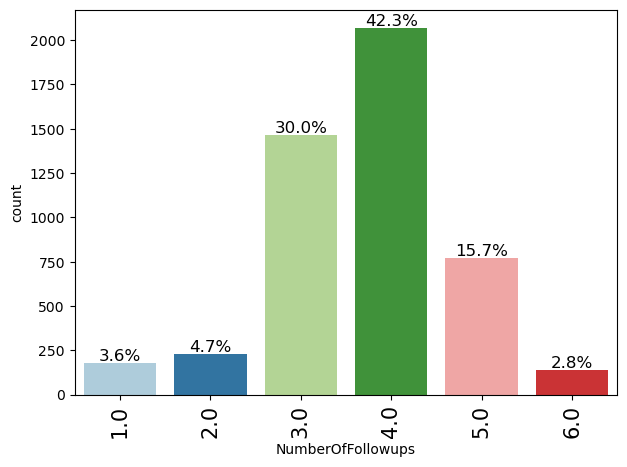

In [27]:
#Observation on NumberOfFollowups
labeled_barplot(data1, "NumberOfFollowups", perc=True)

- There most number of followups after a sales pich to a customer is four (43.2%). This si followed by three 30%) followups, five (15.7%) followups. two, one and six number of followups are few i.e. less than 5% each of the total followups after a sales pitch

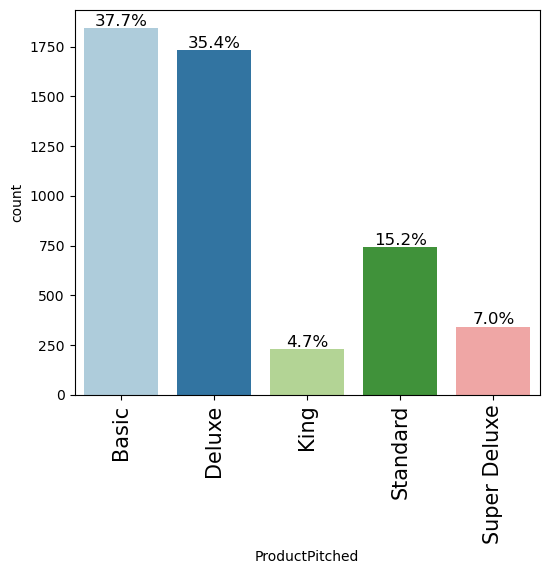

In [28]:
#Observation on ProductPitched
labeled_barplot(data1, "ProductPitched", perc=True)

- The most products pitched by salesperson are Basic (37.7%), Deluxe (35.4%). This is followed by Standard (15.2%). The Super Deluxe and King products are less than 10%

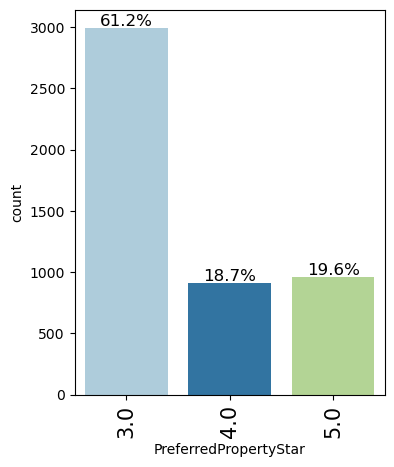

In [29]:
#Observation on PreferredPropertyStar
labeled_barplot(data1, "PreferredPropertyStar", perc=True)

- Customers prefer hotel property rating with 3.0 star (61.2%) rating. The 4.0 star rating and 5.0 star rating are 18.7% and 19.6% respectively.

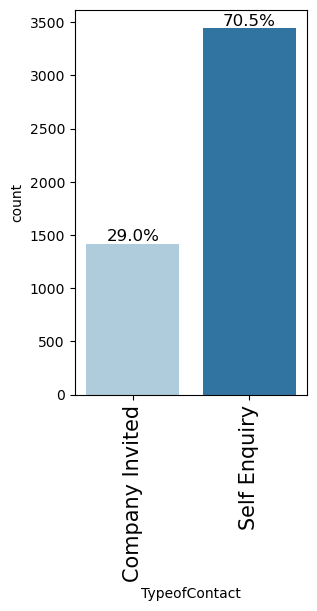

In [30]:
#Observation on Type of Contact
labeled_barplot(data1, "TypeofContact", perc=True)

- There are more customers who made self enquiry (71%) compared to company invited customers (29%)

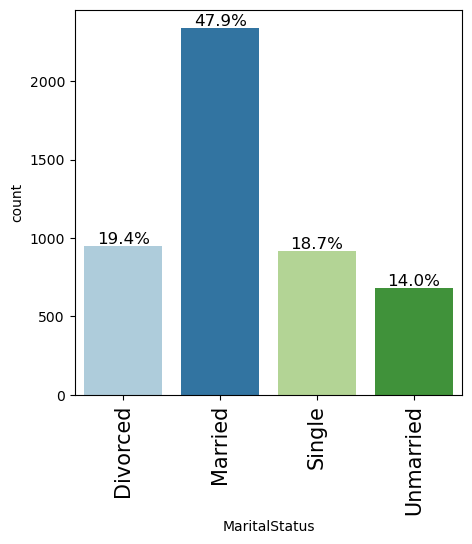

In [31]:
#Observation on Marital Status
labeled_barplot(data1, "MaritalStatus", perc=True)

- The data shows that there are more married customers (47.9%). This is followed by Divorced customers (19.4%) and single customers (18.7%). Unmarried customers are the fewest representing 14%) of the mix

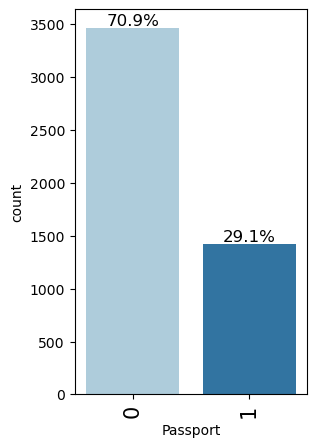

In [32]:
#Observation on Passport
labeled_barplot(data1, "Passport", perc=True)

- There are more customers with no passports (70.9%) than customers with passport (29.1%)

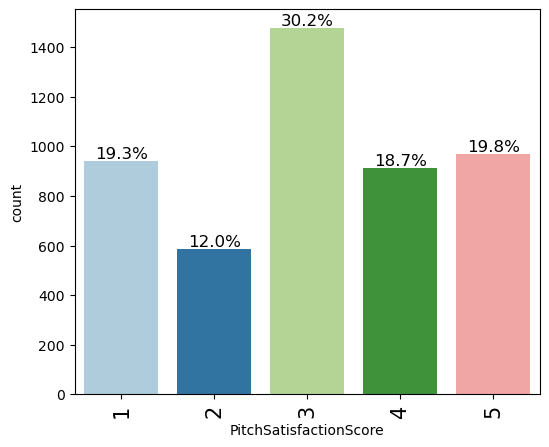

In [33]:
#Observation on PitchSatisfactionScore:
labeled_barplot(data1, "PitchSatisfactionScore", perc=True)

- The highest pitch satisfaction score is 3 (30.2%). Pitch Satisfaction Scores of 1, 4 and 5 are slightly less than 20% while a score of 2 was makes up 12% of the scores

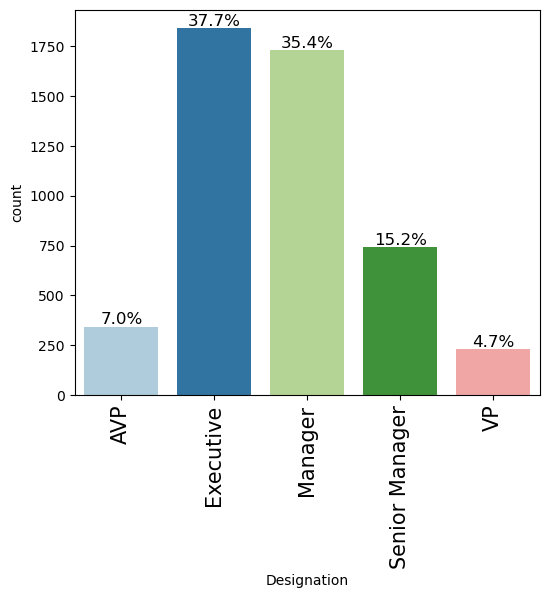

In [34]:
#Observation on Designation
labeled_barplot(data1, "Designation", perc=True)

- There are more executives 37.7%) in the customer base compared to Managers (35.4%), Senior Managers (15.2%). VPs and AVPs make up 4.7% and 7.0% of customers respectively

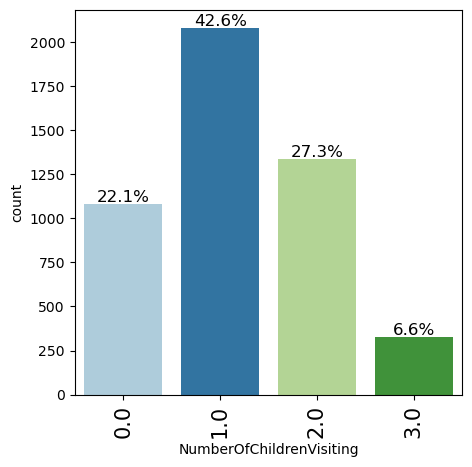

In [35]:
#Observation on Number of Children visiting
labeled_barplot(data1, "NumberOfChildrenVisiting", perc=True)

 - There are more total 1 child (42.6%) visiting compared to two children visiting (27.3%), no child visiting (22.1%), and three children visiting (6.6%)

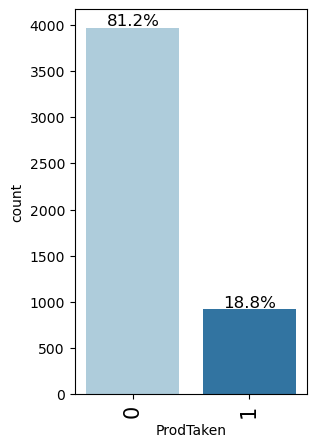

In [36]:
#Observation on Product taken
labeled_barplot(data1, "ProdTaken", perc=True)

- 18.8% of customers have purchased the package while the remaining 81.2% of customers have not purchased the package

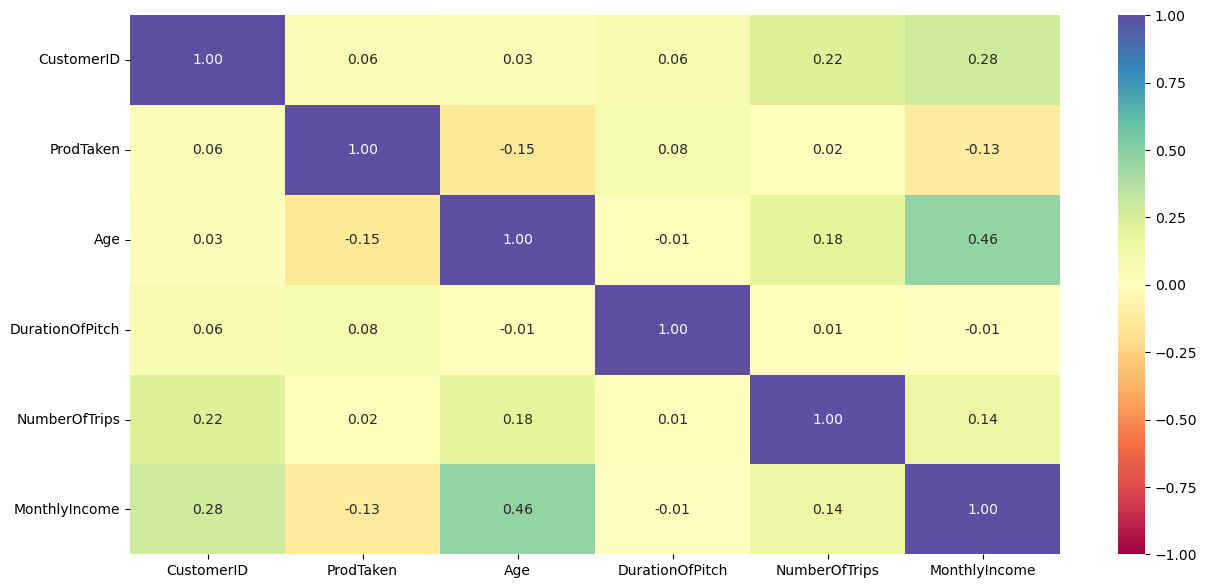

In [37]:
plt.figure(figsize=(15, 7))
sns.heatmap(data1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

- **Please note** that the CustomerID column is only included here because the codes throws up errors after dropping this column 
- Gross monthly income is moderatly positively correlated with age and have slight positive correlation with 
- ProdTaken and Duration of pitch are slightly negatively correlated with gross mothly income. ProdTaken has slight positive correlation with number of trips and duration of pitch. This suggests that increasing these variables may lead to an increase in customers purchasing the package
- Age is only slightly positively correlated with gross monthly income and Number of trips, and negatively correlated with duration of pitch and ProdTaken


## Bivariate Analysis

In [38]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


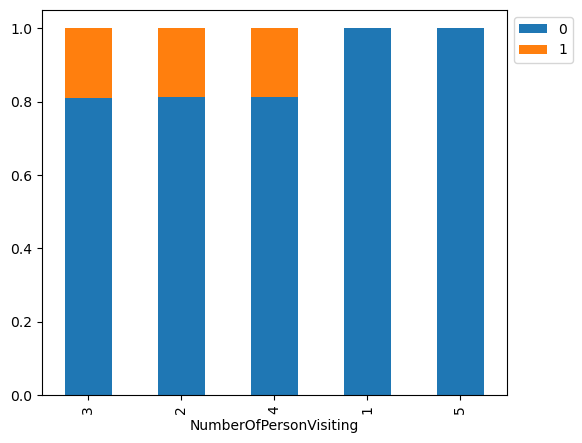

In [39]:
stacked_barplot(data1, "NumberOfPersonVisiting", "ProdTaken" )

- If the number of persons planning to take the trip with the customers are 2, 3 and 4, there is a 20% chance of the customer buying the package. On the other hand, if the number of persons planning to take the trip with the customer are 1 and 5, the customer does not purchase the package 

ProdTaken             0    1   All
NumberOfFollowups                 
All                3931  912  4843
4.0                1689  379  2068
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


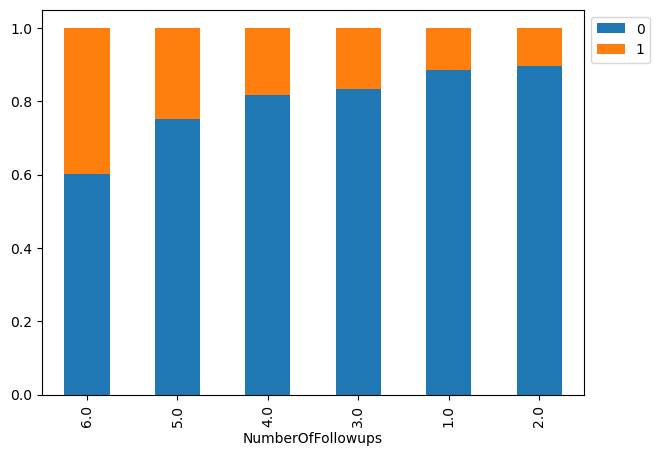

In [40]:
#Product Taken vs Number of follow ups
stacked_barplot(data1, "NumberOfFollowups", "ProdTaken" )

- The likelyhood of a customer purchasing the package increases after the 1st and 2nd followups 

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


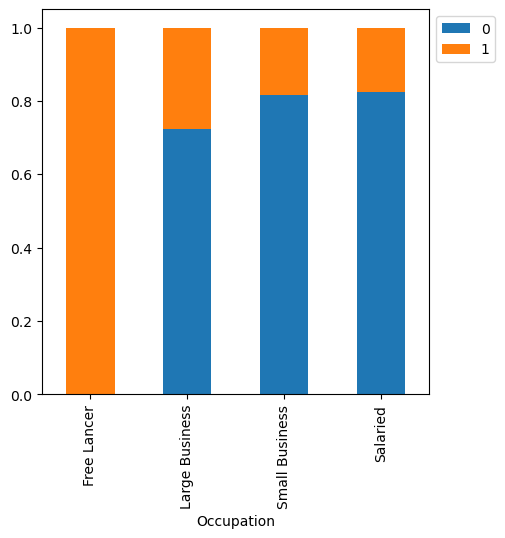

In [41]:
#Product Taken vs Occupation
stacked_barplot(data1, "Occupation", "ProdTaken" )

- Even though freelances make a minute percentage of the total customers, the proportion of a freelance purchasing the package is higher.  Proportion of large business owners are more than the proportion of small business owners who are more likely to purchase the package. Proportion of salaried employees that are least likely to purchase the package are more.

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


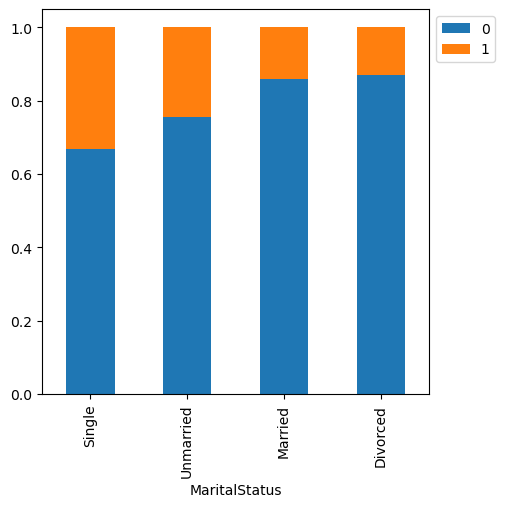

In [42]:
#Product Taken vs Marital Status
stacked_barplot(data1, "MaritalStatus", "ProdTaken" )

- The proportion of single people buying the package is more compared to the others. The proportion of divorced and married customers buying the package are less.

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


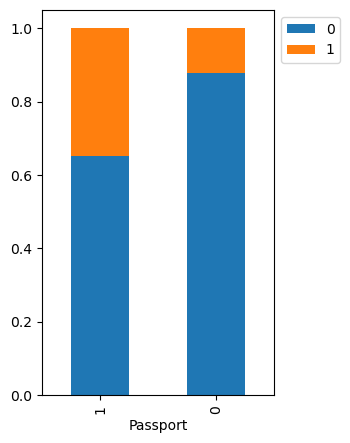

In [43]:
#Product Taken vs Passport
stacked_barplot(data1, "Passport", "ProdTaken" )

- Even though there are more customers without passport, the proportion of customers without passport that purchase the package are relatively less than the proportion of customers with passport who purchase the package.

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


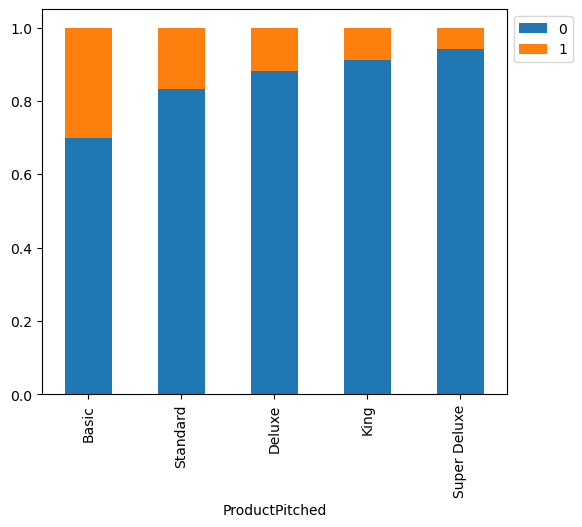

In [44]:
#Product Taken vs ProductPitched
stacked_barplot(data1, "ProductPitched", "ProdTaken" )

- clearly there are more proportion of Basic product pitched that was purchased (552 out of 1842 pitched) compared to other products. This is followed by standard, then Deluxe, King. The product with the least proportion of sale is Super Deluxe


ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


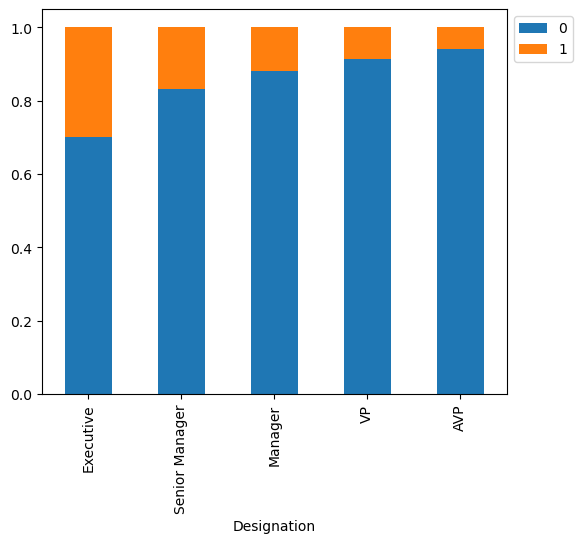

In [45]:
#Product Taken vs Designation
stacked_barplot(data1, "Designation", "ProdTaken" )

- There are more proportion of executives who purchase the package. This is followed by Senior Managers, Manager, VP and AVP(with least proportion of customers who purchase the product)

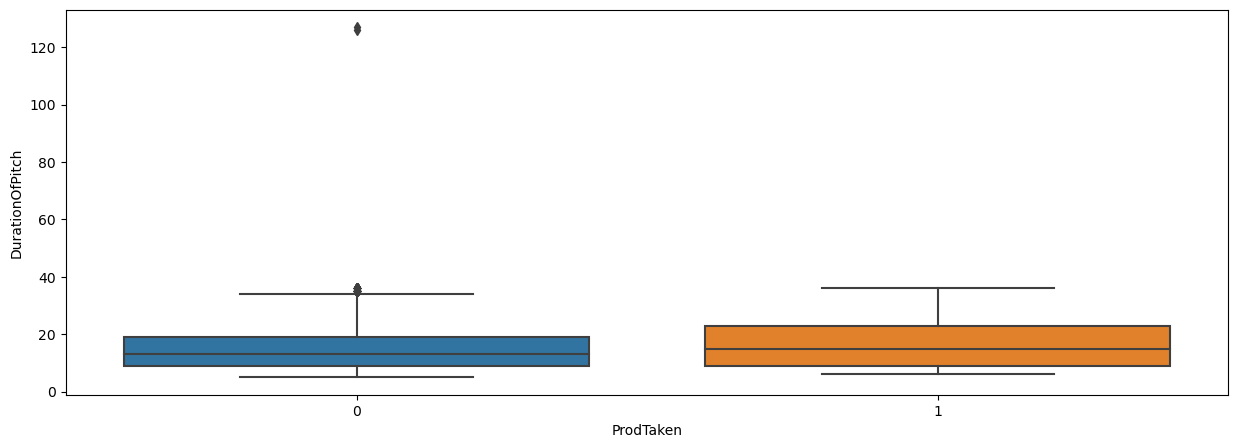

In [46]:
#product taken vs duration of pitch
plt.figure(figsize=(15,5))
sns.boxplot(y='DurationOfPitch',x='ProdTaken',data=data1)
plt.show()

- Duration of pitch to customers who did not purchase the package has outliers. 
- There is a similar spread in duration of pitch for customers who purchase the package vs customers who do not purchase the package.

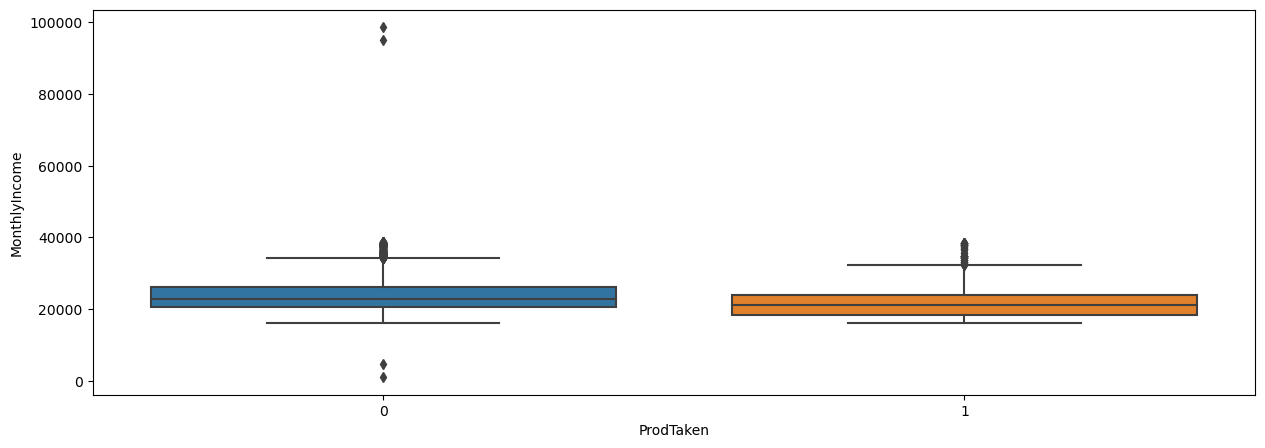

In [47]:
#Product taken vs monthly income
plt.figure(figsize=(15,5))
sns.boxplot(y='MonthlyIncome',x='ProdTaken',data=data1)
plt.show()

- There are outliers in the monthly income of customers who purchase and did not purchase the product
- The median income for customers who purchased the product is ~ 20000, while the median gross monthly income for customers who did not purchase the package is ~22000

#Product taken vs designation 
plt.figure(figsize=(15,5))
sns.boxplot(y='Designation',x='ProdTaken',data=data1)
plt.show()

## Statistical Summary of Products Pitched with respect to actual purchases made 

In [48]:
#Customer profile by Basic product
data1[(data1['ProductPitched']=='Basic') & (data1['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,552.0,NaN,NaN,NaN,202605.467391,1445.951867,200002.0,201387.25,202444.5,203825.75,204887.0
ProdTaken,552.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,515.0,NaN,NaN,NaN,31.28932,9.070829,18.0,25.0,30.0,35.0,59.0
TypeofContact,549,2,Self Enquiry,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.0,3.0,1.0,392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,532.0,NaN,NaN,NaN,15.791353,7.906926,6.0,9.0,14.0,22.0,36.0
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.0,3.0,3.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,548.0,6.0,4.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 - The mean age for customers who purchase the **Basic** package is 31.2 years. The youngest customer who purchase this package is 18 years and the oldest customer to purchase this package is 59 years.
 - The top purchasers of this package are males, salaried workers, single, executives, customers who made self enquiries.

In [49]:
#Customer profile by Standard product
data1[(data1['ProductPitched']=='Standard') & (data1['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,124.0,NaN,NaN,NaN,202621.693548,1453.911893,200050.0,201444.75,202467.5,203856.25,204885.0
ProdTaken,124.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,123.0,NaN,NaN,NaN,41.00813,9.876695,19.0,33.0,38.0,49.0,60.0
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.0,3.0,3.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,123.0,NaN,NaN,NaN,19.065041,9.048811,6.0,11.0,17.0,29.0,36.0
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.0,3.0,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,124.0,6.0,4.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 - The mean age for customers who purchase the **Standard** package is 41 years. The youngest customer who purchase this package is 19 years and the oldest customer to purchase this package is 60 years.
 - The top purchasers of this package are males, small business owners, married, senior managers, customers who made self enquiries.

In [50]:
#Customer profile by Deluxe product
data1[(data1['ProductPitched']=='Deluxe') & (data1['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,204.0,NaN,NaN,NaN,202596.872549,1454.182002,200000.0,201388.5,202441.5,203819.5,204883.0
ProdTaken,204.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,198.0,NaN,NaN,NaN,37.641414,8.469575,21.0,32.0,35.5,44.0,59.0
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204.0,2.0,3.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,180.0,NaN,NaN,NaN,19.1,9.227176,6.0,11.0,16.0,28.0,36.0
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,2,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204.0,3.0,3.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,200.0,6.0,4.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The mean age for customers who purchase the **Deluxe** package is 37.6 years. The youngest customer who purchase this package is 21 years and the oldest customer to purchase this package is 59 years.
- The top purchasers of this package are males, small business owners, married, Managers, customers who made self enquiries. Morever, the top customers who purchase this package live in Tier3 City

In [51]:
#Customer profile by Super Deluxe product
data1[(data1['ProductPitched']=='Super Deluxe') & (data1['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,20.0,NaN,NaN,NaN,202834.6,1452.761958,200706.0,201937.75,202785.5,203905.25,204865.0
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,43.5,4.83953,39.0,40.0,42.0,45.25,56.0
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,3.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,18.5,7.330542,8.0,15.0,18.5,20.0,31.0
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,6.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The mean age for customers who purchase the **Super Deluxe** package is 43.5 years. The youngest customer who purchase this package is 39 years and the oldest customer to purchase this package is 56 years.
- The top purchasers of this package are males, salaried workers, singles, AVPs, customers who received company invite. Morever, the top customers who purchase this package live in Tier3 city

In [52]:
#Customer profile by King product
data1[(data1['ProductPitched']=='King') & (data1['ProdTaken']==1)].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,20.0,NaN,NaN,NaN,202529.9,1492.553407,200045.0,201364.5,202430.5,203507.5,204816.0
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,4.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- The mean age for customers who purchase the **King** package is 48.9 years. The youngest customer who purchase this package is 27 years and the oldest customer to purchase this package is 59 years.
- The top purchasers of this package are females, small business owners, singles, VPss, customers who made self enquiries. Morever, the top customers who purchase this package live in Tier1 City

## Outlier Detection and Treatment

In [53]:
100*data1.NumberOfTrips.value_counts(normalize=True)

2.0     30.834035
3.0     22.725358
1.0     13.058130
4.0     10.067397
5.0      9.646167
6.0      6.781803
7.0      4.591407
8.0      2.211457
19.0     0.021061
21.0     0.021061
20.0     0.021061
22.0     0.021061
Name: NumberOfTrips, dtype: float64

**Observations**
- Number of trips of 19 and above makes a very small percentage of the data. These are outliers and needs to be treated

In [54]:
100*data1.DurationOfPitch.value_counts(normalize=True)

9.0      10.416217
7.0       7.375458
8.0       7.181367
6.0       6.620660
16.0      5.908993
15.0      5.801165
14.0      5.456114
10.0      5.262023
13.0      4.809144
11.0      4.420962
12.0      4.205305
17.0      3.709295
30.0      2.048738
22.0      1.919344
31.0      1.789950
23.0      1.703688
18.0      1.617425
29.0      1.595859
32.0      1.595859
25.0      1.574294
21.0      1.574294
27.0      1.552728
26.0      1.552728
24.0      1.509597
35.0      1.423334
20.0      1.401768
28.0      1.315506
33.0      1.229243
19.0      1.229243
34.0      1.078283
36.0      0.948889
5.0       0.129394
126.0     0.021566
127.0     0.021566
Name: DurationOfPitch, dtype: float64

- Duration of pitch greater than 37 makes up higher than usual aspects of the data

In [55]:
100*data1.MonthlyIncome.value_counts(normalize=True)

20855.0    0.150376
21288.0    0.150376
17342.0    0.150376
21020.0    0.150376
24950.0    0.128894
             ...   
17074.0    0.021482
24250.0    0.021482
21077.0    0.021482
24714.0    0.021482
21471.0    0.021482
Name: MonthlyIncome, Length: 2475, dtype: float64

- Monthly income less than 12,000 and greater than 24,000 are outliers

**Treating or removing outliers from duration of pitch, monthly income, and number of trips**

In [56]:
# Create a filter for observations with duration of pitch greater than 40
filter1 = data1['DurationOfPitch'] > 40

# Create a filter for observations with monthly income less than 12000 or greater than 40000
filter2 = (data1['MonthlyIncome'] < 12000) | (data1['MonthlyIncome'] > 40000)

# Create a filter for observations with number of trips greater than 8
filter3 = data1['NumberOfTrips'] > 8

# Apply the filters to drop the corresponding observations
data1 = data1[~filter1]
data1 = data1[~filter2]
data1 = data1[~filter3]


In [57]:
data1.describe()  #Statistical summary

,CustomerID,ProdTaken,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,4878.000000,4878.000000,4653.000000,4627.000000,4738.000000,4645.000000
mean,202444.849938,0.188192,37.621320,15.449319,3.222035,23600.630786
std,1411.044693,0.390905,9.321348,8.208413,1.780694,5147.662625
min,200000.000000,0.000000,18.000000,5.000000,1.000000,16009.000000
25%,201223.250000,0.000000,31.000000,9.000000,2.000000,20346.000000
50%,202443.500000,0.000000,36.000000,13.000000,3.000000,22351.000000
75%,203666.750000,0.000000,44.000000,20.000000,4.000000,25571.000000
max,204887.000000,1.000000,61.000000,36.000000,8.000000,38677.000000


- The outliers have been removed from the data

## Data Preparation for Modeling

- The objective of the model is to predict which customer is going to purchase the newly introduced package


In [58]:
#Separating target variable and other variables
X=data.drop(columns=['ProdTaken','CustomerID',])
Y=data['ProdTaken']

In [59]:
#Dropping DurationOfPitch', 'NumberOfFollowups', 'ProductPitched', 'PitchSatisfactionScore' columns
X.drop(columns=['DurationOfPitch', 'NumberOfFollowups', 'ProductPitched', 'PitchSatisfactionScore'],inplace=True)

In [60]:
#Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1,stratify=Y)

- replace missing values using median for continuous variables and mode for categorical variables, using simple imputer

In [61]:
# Initializing the SimpleImputer method with median
si1=SimpleImputer(strategy='median')

# Assigning the columns to be imputed
median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

#Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

In [62]:
# Initializing the SimpleImputer method with most_frequent
si2=SimpleImputer(strategy='most_frequent')

# Assigning the columns to be imputed
mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

#Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

#Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

In [63]:
#Confirm the above by printing out the number in categorical variables
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64
------------------------------
Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


- All missing values in the dataset has been replaced

## Creating dummies for string type variables, and convert other colummns back to float

In [64]:
#converting data types of columns to float
for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [65]:
#List of columns to create a dummy variables
col_dummy=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [66]:
#Encoding categorical varaibles
X_train = pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test = pd.get_dummies(X_test, columns=col_dummy, drop_first=True)


## Model Building

### Model Evaluation Criterion

**The model can make wrong predictions as:**
1. Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity

**Which case is more important?**
* Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not be targeted by the marketing team when he should be targeted.

**How to reduce this loss i.e need to reduce False Negatives?**
* The company wants Recall to be maximized, the greater the Recall lesser the chances of false negatives.

### Functions to calculate different metrices and confusion matrix

In [67]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [68]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building: Decision Tree

In [69]:
# build Decision Tree Classifier Model
d_tree = DecisionTreeClassifier(random_state=1)

## Complete the code to Fit the decision tree model on X_train and y_train
d_tree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

**Checking model performance on the training data**

In [70]:
#Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(d_tree, X_train,Y_train)
print("Training performance:\n", d_tree_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


- The training performance overfits the model

**Checking model performance on the test data**

In [71]:
d_tree_model_test_perf = model_performance_classification_sklearn(d_tree, X_test,Y_test)
print("Testing performance:\n", d_tree_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision       F1
0  0.875256  0.681159   0.664311  0.67263


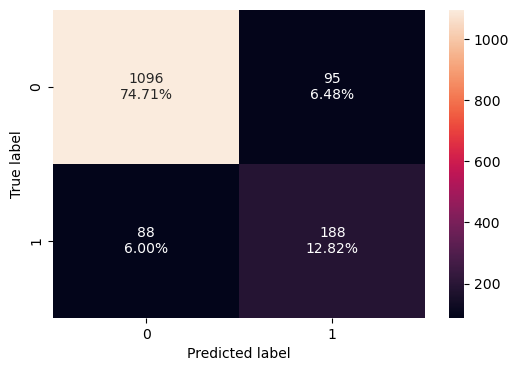

In [72]:
#Confusion matrix for test data
confusion_matrix_sklearn(d_tree,X_test,Y_test)

### Model Improvement: Decision Tree

In [73]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Complete the code to fit the above model on train data. 
dtree_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=3,
                       max_leaf_nodes=5, min_impurity_decrease=0.0001,
                       random_state=1)

**Checking model performance on the training data**

In [74]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train,Y_train)
print("Training performance:\n", dtree_estimator_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.726396  0.630435   0.367754  0.464531


**Checking model performance on the test data**

In [75]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test,Y_test)
print("Testing performance:\n", dtree_estimator_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.736878  0.630435   0.379913  0.474114


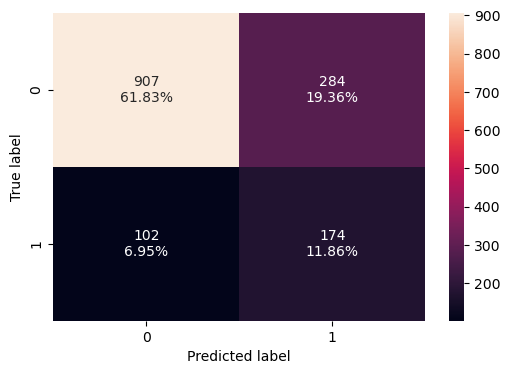

In [76]:
#Confusion matrix for test data
confusion_matrix_sklearn(dtree_estimator,X_test,Y_test)

### Model Building: Random Forest

In [123]:
# Initializing the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,Y_train) 

RandomForestClassifier(random_state=1)

**Checking model performance on the training data**

In [124]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,Y_train)
print("Training performance:\n",rf_estimator_model_train_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [126]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test,Y_test)
print("Training performance:\n",rf_estimator_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.891616  0.471014   0.909091  0.620525


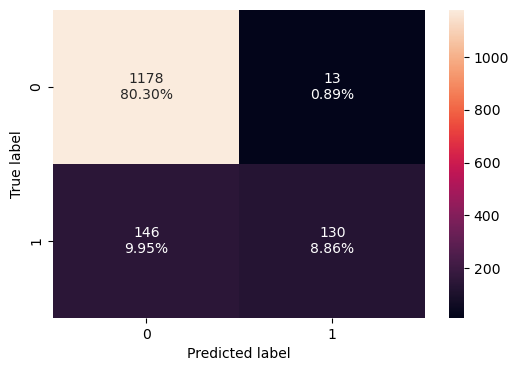

In [127]:
#To get the confusion matrix for the above random forest model
confusion_matrix_sklearn(rf_estimator, X_test,Y_test)

### Model Improvement: Random Forest

In [178]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the above model on training data 
rf_tuned.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=5,
                       max_features='sqrt', min_samples_split=17,
                       n_estimators=50, oob_score=True, random_state=1)

**Checking model performance on the training data**

In [179]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train,Y_train)
print("Training performance:\n",rf_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.802689  0.706522   0.483528  0.574132


**Checking model performance on the testing data**

In [180]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test,Y_test)
print("Training performance:\n",rf_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.802689  0.706522   0.483528  0.574132


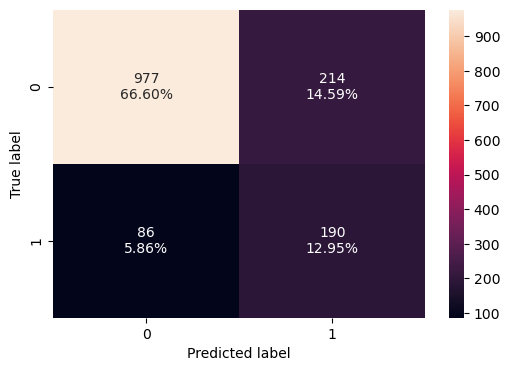

In [132]:
#Confusion matrix for test data
confusion_matrix_sklearn(rf_tuned,X_test,Y_test)

### Model Building: Bagging

In [133]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,Y_train)

BaggingClassifier(random_state=1)

**Checking model performance on the training data**

In [134]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train,Y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.992692  0.962733    0.99839  0.980237


**Checking model performance on the test data**

In [165]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test,Y_test)
print("Training performance:\n",bagging_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.899114  0.539855   0.876471  0.668161


**Confusion Matrix**

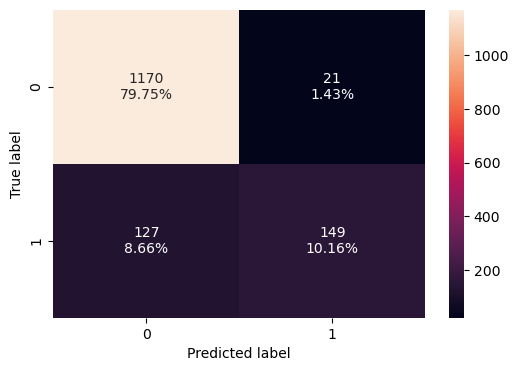

In [136]:
confusion_matrix_sklearn(bagging_classifier,X_test,Y_test)

In [137]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

#fit the above model on training data
bagging_estimator_tuned.fit(X_train, Y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

**Checking model performance on the training data**

In [138]:
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_train, Y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999415  0.996894        1.0  0.998445


**Checking model performance on the test data**

In [169]:
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned, X_test, Y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0   0.91002  0.57971   0.909091  0.707965


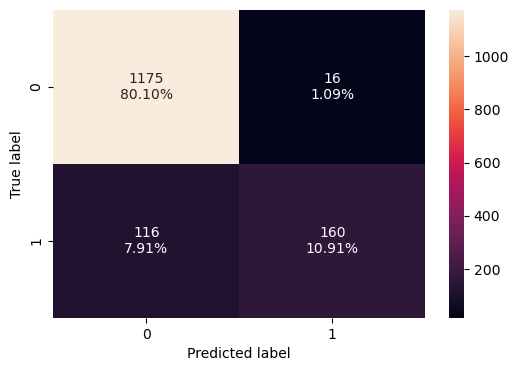

In [140]:
#To get the confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test,Y_test)

### Model Building: AdaBoost

In [141]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,Y_train)  

AdaBoostClassifier(random_state=1)

**Checking model performance on the training data**

In [142]:
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier, X_train, Y_train)
print("Training performance:\n",ab_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.839228  0.270186   0.685039  0.387528


**Checking model performance on the test data**

In [143]:
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier, X_test, Y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.837764  0.271739   0.669643  0.386598


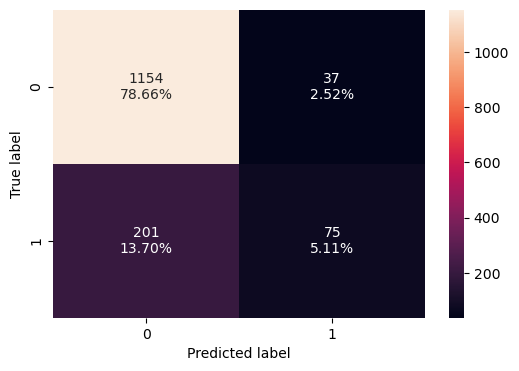

In [144]:
#To get the confusion matrix on test data using the above model 
confusion_matrix_sklearn(ab_classifier, X_test, Y_test)

### Model Improvement: AdaBoost

In [145]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

#fit the above model on training data
abc_tuned.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.6, n_estimators=100, random_state=1)

**Checking model performance on the training data**

In [146]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train, Y_train)
print("Training performance:\n",abc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.965799  0.875776   0.938436  0.906024


**Checking model performance on the test data**

In [166]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test, Y_test)
print("Training performance:\n",abc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.858214  0.572464   0.637097  0.603053


### Model Building: Gradient Boosting

In [148]:
# Initializing the Gradient bossting classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, Y_train) 

GradientBoostingClassifier(random_state=1)

**Checking model performance on the training data**

In [149]:
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier, X_train, Y_train)
print("Training performance:\n",gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.88249  0.437888   0.875776  0.583851


**Checking model performance on the test data**

In [167]:
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier, X_test, Y_test)
print("Training performance:\n",gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.864349  0.373188    0.79845  0.508642


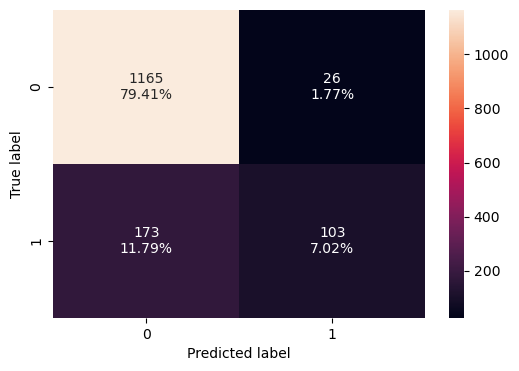

In [152]:
#To get confusion matrix for the above model
confusion_matrix_sklearn(gb_classifier, X_test, Y_test)

### Model Improvement: Gradient Boosting

In [153]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# To fit the above model on training data
gbc_tuned.fit(X_train, Y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

**Checking model performance on the training data**

In [154]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, Y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.905291  0.552795   0.908163  0.687259


**Checking model performance on the test data**

In [155]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test, Y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision       F1
0  0.878664  0.449275   0.826667  0.58216


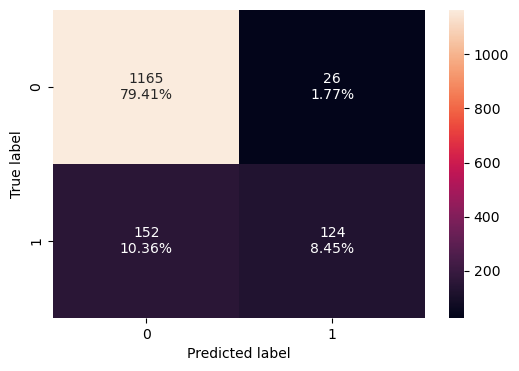

In [156]:
#To get confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, Y_test)

### Model Building: Stacking

In [157]:
# Initializing different models
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = gb_classifier

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train, Y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_split=17,
                                                       n_estimators=50,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                  

**Checking model performance on the training data**

In [158]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier, X_train, Y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.904414  0.574534   0.874704  0.693533


**Checking model performance on the test data**

In [159]:
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier, X_test, Y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.870484  0.460145   0.755952  0.572072


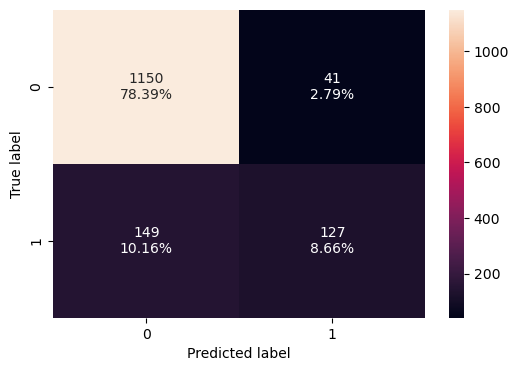

In [160]:
#To get confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, Y_test)

## Model Comparison and Final Model Selection

In [182]:
# Model performance comparison for training data

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T, dtree_estimator_model_train_perf.T, rf_estimator_model_train_perf.T,
    rf_tuned_model_train_perf.T,bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T, stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.726396,0.891616,0.802689,0.899114,0.999415,0.839228,0.858214,0.864349,0.905291,0.904414
Recall,1.0,0.630435,0.471014,0.706522,0.539855,0.996894,0.270186,0.572464,0.373188,0.552795,0.574534
Precision,1.0,0.367754,0.909091,0.483528,0.876471,1.000000,0.685039,0.637097,0.798450,0.908163,0.874704
F1,1.0,0.464531,0.620525,0.574132,0.668161,0.998445,0.387528,0.603053,0.508642,0.687259,0.693533


In [183]:
# Model performance comparison for test data

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T, dtree_estimator_model_test_perf.T, rf_estimator_model_test_perf.T,
    rf_tuned_model_test_perf.T,bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T, stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df



Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,Stacking Classifier
Accuracy,0.875256,0.736878,0.891616,0.795501,0.899114,0.910020,0.837764,0.858214,0.864349,0.878664,0.870484
Recall,0.681159,0.630435,0.471014,0.688406,0.539855,0.579710,0.271739,0.572464,0.373188,0.449275,0.460145
Precision,0.664311,0.379913,0.909091,0.470297,0.876471,0.909091,0.669643,0.637097,0.798450,0.826667,0.755952
F1,0.672630,0.474114,0.620525,0.558824,0.668161,0.707965,0.386598,0.603053,0.508642,0.582160,0.572072


## Observations

- The model accuracy increased a bit for the decision tree estimator. The recall remains thesame for the train and test dataset for the decision tree estimator. The similarity in the train and test scores and the relatively higher recall score of this model makes it the preferred and selected model

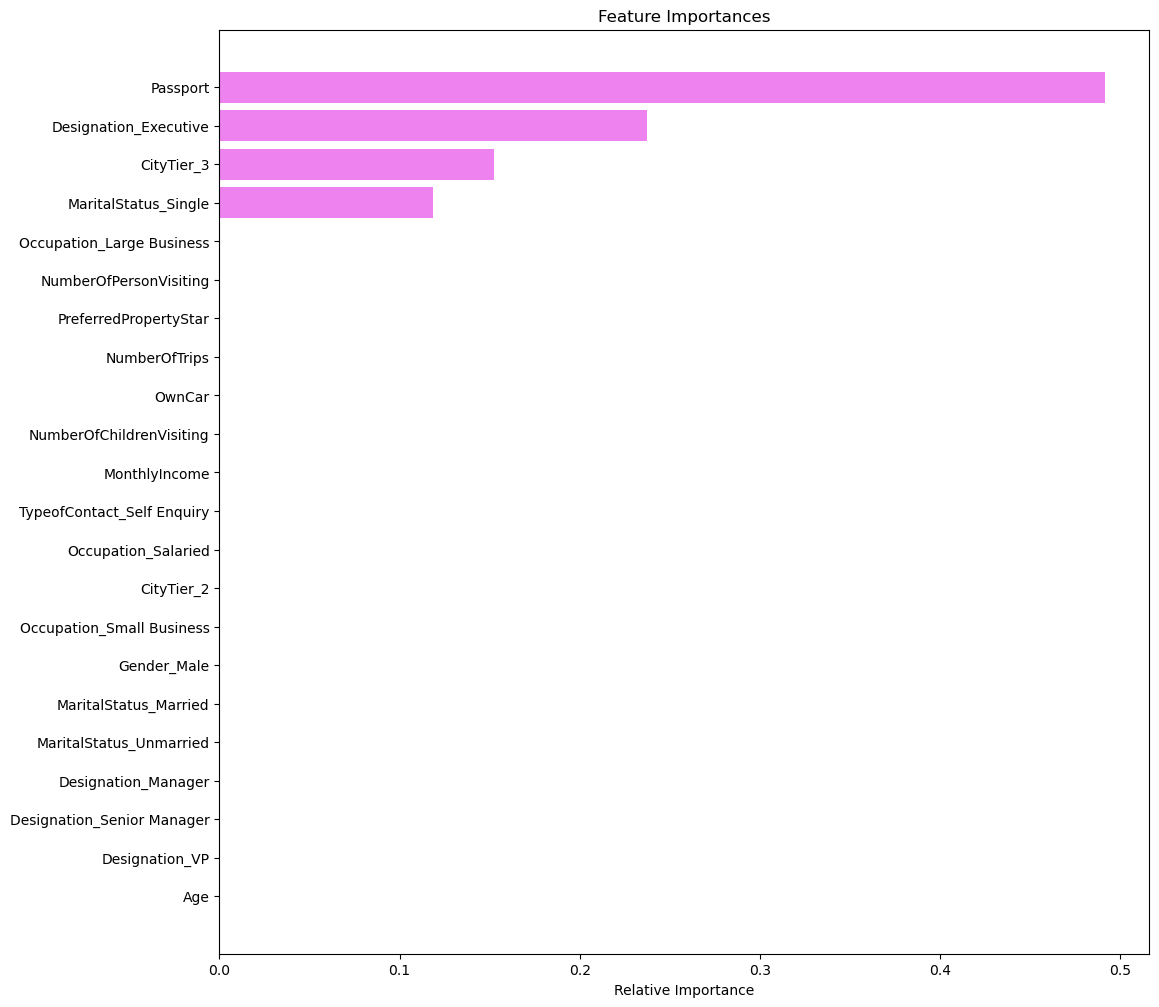

In [181]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Business Recommendations

- The chosen model (decision tree estimator suggests that the most important customers to target are those with passports and are executives. 
- The company should offer short term travel packages and customize the packages for single customers and also customers who live in tier 3 city 
- When implementing a marketing strategy, external factors, such as the number of follow-ups, time of call, should also be carefully considered as the analysis shows that the customers who have been followed up more are the ones buying the package.
- After we identify a potential customer, the company should pitch packages as per the customer's monthly income, for example, do not pitch king packages to a customer with low income and such packages can be pitched more to the higher-income customers.
- The parameters can be changed to get different results and insights